<img src='images/spotify.png' align="left" style="width: 30%; height: 30%">

# Music Classification

Sean Wade

Spotify is a very popular music streaming service.  One of the reseons it is so popular is that it uses machine learning to learn your music taste and recomend similar songs.  More often than not our musical taste fall into distinct genres or types.  For instance, I love bluegrass and folk music but im not crazy about edm.  The goal of this project is to classify which genre a song belongs too.  To solve this we will use the spotify API to get song data.

In [1]:
import requests
import json
import pandas as pd
import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/2kABweT').read())

## Query the API

Using the API requires generating an OAuth key and sending GET and PUT requests to the spotify server.  This REST-full API is very well documented on their site.  THe results from a query are in JSON and must be parsed.

In [ ]:
# Must refresh every 2 hours
OAUTH='BQBjAXDWAbasUDB4IdbOUrha8PxgaYMAHdSv1HBRj_9-DSWhQ5YntnEeuYYD1z46KwZa1OvljzILgQKiQL9mxNyO4XbmO2__0LpgLRSS09Hj5Yby669VCV1PYIisbCS5_GtHINUiIsO7ESIOOtDJyX1ewj-g5Dl54SpGwjv69WPxSM9ZHhknSrMWWoLTsGS0Ud8NntSBBYSGnfKOA2lMrhu10cm3lLdtKS4E-v9r-BtWGUszb8iFyF2cFU9T6gwhpMgDSpc79kTFmJtxZEkzEKUmn3_QSlkNzhXaP02GWfQcq7u1kYpktUJr'
def query_track(query):
    return query.replace(' ', '%20')

# Search an artist
r = requests.get('https://api.spotify.com/v1/search?q=phish&type=artist')

# Search a song
track_name = 'Impossible Germany'
query = query_track(track_name)
r = requests.get('https://api.spotify.com/v1/search?q=' + query + '&type=track&limit=3')
a = r.json()

track_list = []
for x in a['tracks']['items']:
    print x['id'], x['artists'][0]['name']
    track_list.append(x['id'])

In [ ]:
headers = {'Authorization': 'Bearer ' + OAUTH}
r = requests.get('https://api.spotify.com/v1/me/tracks', headers=headers)
track_list = []
for x in r.json()['items']:
    print x['track']['id']
    track_list.append(x['track']['id'])

## Generating the Data

To generate the data I will be pulling from the top genre playlists on spotify.  These songs should represent their repective genres well.  From there I will compile the features I want for each song and store it in a pandas dataFrame.

In [ ]:
def get_audio_feautures(track_id_list, OAUTH):
    headers = {'Authorization': 'Bearer ' + OAUTH}
    f_list = []
    for track in tqdm.tqdm(track_id_list):
        try:
            r = requests.get('https://api.spotify.com/v1/audio-features/'+track, headers=headers)
            features = r.json()
            # Drop unwanted info
            del features['uri']
            del features['track_href']
            del features['analysis_url']
            del features['type']
            f_list.append(features)
        except:
            pass
    return f_list

In [ ]:
def get_category_playlists(category):
    headers = {'Authorization': 'Bearer ' + OAUTH}
    r = requests.get("https://api.spotify.com/v1/browse/categories/{}/playlists?country=US&limit=50".format(category), headers=headers)
    r = r.json()
    
    playlist_ids = []
    owner_ids = []
    for x in r['playlists']['items']:
        owner_id = x['owner']['id']
        playlist_id = x['id']
        playlist_ids.append(playlist_id)
        owner_ids.append(owner_id)
        
    return playlist_ids, owner_ids

In [ ]:
def get_playlist_songs(playlist_id, user_id):
    feature_list = []
    headers = {'Authorization': 'Bearer ' + OAUTH}
    for i in tqdm.tqdm(range(len(playlist_id))):
        r = requests.get('https://api.spotify.com/v1/users/{}/playlists/{}/tracks'.format(user_id[i].encode('utf-8'), playlist_id[i].encode('utf-8')), headers=headers)
        r = r.json()
        for x in r['items']:
            feature_list.append(x['track']['id'])
    print len(feature_list)   
    return get_audio_feautures(feature_list, OAUTH)

In [ ]:
playlist_ids, owner_ids = get_category_playlists('country')
country = get_playlist_songs(playlist_ids, owner_ids)
country = pd.DataFrame(country)
country.to_csv('country.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('pop')
pop = get_playlist_songs(playlist_ids, owner_ids)
pop = pd.DataFrame(pop)

In [ ]:
playlist_ids, owner_ids = get_category_playlists('focus')
focus = get_playlist_songs(playlist_ids, owner_ids)
focus = pd.DataFrame(focus)

In [ ]:
playlist_ids, owner_ids = get_category_playlists('metal')
metal = get_playlist_songs(playlist_ids, owner_ids)
metal = pd.DataFrame(metal)
metal.to_csv('metal.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('folk_americana')
folk_americana = get_playlist_songs(playlist_ids, owner_ids)
folk_americana = pd.DataFrame(folk_americana)
folk_americana.to_csv('folk_americana.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('rnb')
rnb = get_playlist_songs(playlist_ids, owner_ids)
rnb = pd.DataFrame(rnb)
rnb.to_csv('rnb.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('workout')
workout = get_playlist_songs(playlist_ids, owner_ids)
workout = pd.DataFrame(workout)
workout.to_csv('workout.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('hiphop')
hiphop = get_playlist_songs(playlist_ids, owner_ids)
hiphop = pd.DataFrame(hiphop)
hiphop.to_csv('hiphop.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('edm_dance')
edm_dance = get_playlist_songs(playlist_ids, owner_ids)
edm_dance = pd.DataFrame(edm_dance)
edm_dance.to_csv('edm_dance.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('indie_alt')
indie_alt = get_playlist_songs(playlist_ids, owner_ids)
indie_alt = pd.DataFrame(indie_alt)
indie_alt.to_csv('indie_alt.csv')

In [ ]:
playlist_ids, owner_ids = get_category_playlists('rock')
rock = get_playlist_songs(playlist_ids, owner_ids)
rock = pd.DataFrame(rock)
rock.to_csv('rock.csv')

## Load and Combine Data

In [100]:
dance = pd.read_csv('data/edm_dance.csv', index_col=0)
country = pd.read_csv('data/country.csv',index_col=0)
# make boolean for classification
dance['genre'] = 1
country['genre'] = 0
country.drop(['uri'],1,inplace=True)
data = pd.concat([dance, country]).drop_duplicates().reset_index(drop=True)
data.dropna(inplace=True)
labels = data['genre']
data.drop(['id','genre'], 1, inplace=True)

In [101]:
# One-hot encode key attribute
data = pd.concat([data, pd.get_dummies(data['key'])], axis=1)
data.drop('key', 1, inplace=True)

## First Look

In [102]:
data.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
0      0.004200         0.583       196875   0.934          0.011700   
1      0.509000         0.794       163515   0.773          0.000039   
2      0.000097         0.517       195005   0.828          0.841000   
3      0.000763         0.477       162187   0.916          0.684000   
4      0.031900         0.514       184762   0.862          0.171000   

   liveness  loudness  mode  speechiness    tempo ...  2  3  4  5  6  7  8  9  \
0     0.184    -6.177     0       0.0836  127.947 ...  0  0  0  0  0  0  1  0   
1     0.402    -5.923     1       0.0569  121.972 ...  0  0  0  0  0  1  0  0   
2     0.411    -5.648     0       0.0482  128.077 ...  0  0  0  0  0  0  1  0   
3     0.124    -4.940     1       0.0370  127.990 ...  0  0  0  0  0  0  0  0   
4     0.119    -6.329     0       0.1560  126.112 ...  0  0  0  0  0  0  0  0   

   10  11  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 24 columns]

#### Country Music

In [103]:
data[labels==0].describe(percentiles=[])

acousticness  danceability    duration_ms       energy  \
count   1416.000000   1416.000000    1416.000000  1416.000000   
mean       0.241003      0.569957  218693.730226     0.672162   
std        0.258024      0.106058   44236.738498     0.206740   
min        0.000063      0.200000   40882.000000     0.042700   
50%        0.126000      0.570000  213569.500000     0.722500   
max        0.946000      0.945000  586400.000000     0.994000   

       instrumentalness     liveness     loudness         mode  speechiness  \
count       1416.000000  1416.000000  1416.000000  1416.000000  1416.000000   
mean           0.007284     0.176007    -6.772641     0.902542     0.044798   
std            0.047549     0.133416     3.038928     0.296685     0.041424   
min            0.000000     0.021200   -23.455000     0.000000     0.022800   
50%            0.000001     0.123000    -5.935000     1.000000     0.035400   
max            0.915000     0.976000    -0.606000     1.000000     0.940000   

             tempo     ...                 2            3            4  \
count  1416.000000     ...       1416.000000  1416.000000  1416.000000   
mean    124.260107     ...          0.116525     0.040960     0.089689   
std      29.945606     ...          0.320967     0.198269     0.285837   
min      51.151000     ...          0.000000     0.000000     0.000000   
50%     122.234000     ...          0.000000     0.000000     0.000000   
max     205.958000     ...          1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  1416.000000  1416.000000  1416.000000  1416.000000  1416.000000   
mean      0.055085     0.061441     0.134887     0.052260     0.110169   
std       0.228226     0.240222     0.341724     0.222629     0.313212   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                10           11  
count  1416.000000  1416.000000  
mean      0.054379     0.076977  
std       0.226843     0.266650  
min       0.000000     0.000000  
50%       0.000000     0.000000  
max       1.000000     1.000000  

[6 rows x 24 columns]

#### Dance Music

In [104]:
data[labels==1].describe(percentiles=[])

acousticness  danceability   duration_ms       energy  \
count   3439.000000   3439.000000  3.439000e+03  3439.000000   
mean       0.101827      0.632848  2.584839e+05     0.773004   
std        0.193281      0.138365  9.528475e+04     0.185911   
min        0.000006      0.096400  1.666600e+04     0.007940   
50%        0.018200      0.645000  2.273730e+05     0.824000   
max        0.995000      0.988000  1.326000e+06     0.999000   

       instrumentalness     liveness     loudness         mode  speechiness  \
count       3439.000000  3439.000000  3439.000000  3439.000000  3439.000000   
mean           0.310495     0.207015    -6.296430     0.512067     0.083793   
std            0.367930     0.175862     3.489221     0.499927     0.075362   
min            0.000000     0.009360   -29.969000     0.000000     0.024200   
50%            0.066800     0.129000    -5.594000     1.000000     0.055600   
max            0.989000     0.979000     1.135000     1.000000     0.800000   

             tempo     ...                 2            3            4  \
count  3439.000000     ...       3439.000000  3439.000000  3439.000000   
mean    126.371244     ...          0.073277     0.032858     0.063391   
std      20.684499     ...          0.260629     0.178292     0.243699   
min      53.507000     ...          0.000000     0.000000     0.000000   
50%     126.007000     ...          0.000000     0.000000     0.000000   
max     232.080000     ...          1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  3439.000000  3439.000000  3439.000000  3439.000000  3439.000000   
mean      0.088689     0.090142     0.111370     0.077639     0.081710   
std       0.284335     0.286427     0.314635     0.267641     0.273962   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                10           11  
count  3439.000000  3439.000000  
mean      0.061355     0.098866  
std       0.240015     0.298525  
min       0.000000     0.000000  
50%       0.000000     0.000000  
max       1.000000     1.000000  

[6 rows x 24 columns]

## Visualize

In [105]:
data[labels==1].iloc[:,13:].sum().plot(kind='bar')
plt.title('Dance Key Distribution')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

In [106]:
data[labels==0].iloc[:,13:].sum().plot(kind='bar')
plt.title('Country Key Distribution')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

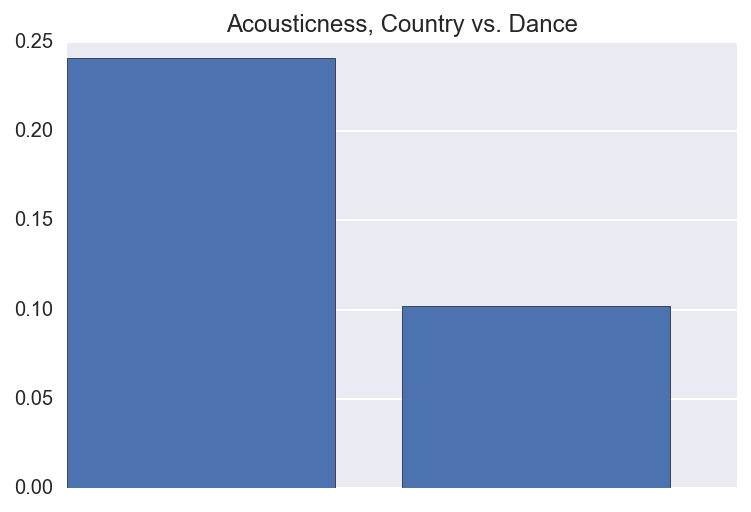

In [107]:
plt.bar([1,2], [data[labels==0].mean()['acousticness'],  data[labels==1].mean()['acousticness']])
plt.title('Acousticness, Country vs. Dance')
plt.xticks([])
plt.show()

In [108]:
plt.bar([1,2], [data[labels==0].mean()['energy'],  data[labels==1].mean()['energy']])
plt.title('Energy, Country vs. Dance')
plt.xticks([])
plt.show()

## Dimensionality Reduction

In [127]:
points = TSNE(learning_rate=100).fit_transform(data)

In [128]:
plt.scatter(points[:,0], points[:,1], c=labels, cmap=plt.cm.Accent)
plt.axis('off')
plt.show()

In [113]:
pca_points = PCA().fit_transform(data)

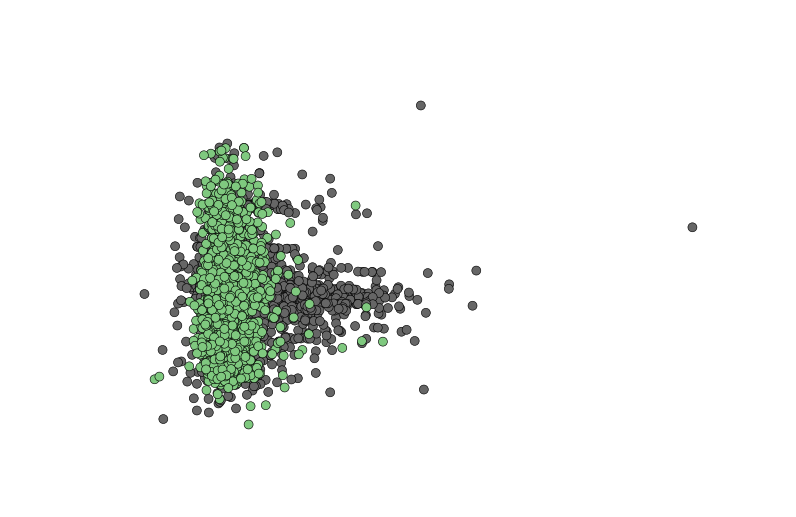

In [116]:
plt.scatter(pca_points[:,0], pca_points[:,1], c=labels, cmap=plt.cm.Accent)
plt.axis('off')
plt.show()

## Learning

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [144]:
# Split test and training set
x_train, x_test,y_train, y_test = train_test_split(data, labels)

#### Logistic Regression

In [147]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
model.score(x_test, y_test)

0.71499176276771004

#### Neural Network

In [150]:
model = MLPClassifier(solver='adam', alpha=.001, activation='relu', max_iter=200000, early_stopping=False,
                      hidden_layer_sizes=(50), random_state=1)
model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [151]:
model.score(x_test, y_test)

0.71499176276771004

#### SVM

In [152]:
model = svm.SVC()
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [153]:
model.score(x_test, y_test)

0.73558484349258646

## Conclusion

I was able to get a prediction accuracy in the lower 70's.  I was hopping and I believe it is posible to get better than this.  The main problem is the feautes I am using.  While they do offer some insight, they are not great at dividing the classes.  Ideally I would be able to use the raw song data, but this is illegal to scrape.